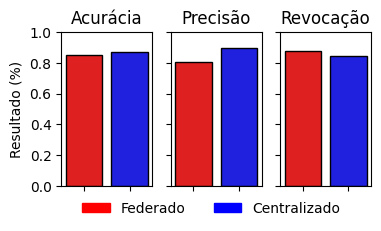

In [ ]:
NOME_PT = {"Accuracy" : "Acurácia", "Precision" : "Precisão", "Recall": "Revocação",}
PT_LABELS = ['Acurácia', 'Precisão', 'Recall']


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

# Define metrics and models
metrics = ["Accuracy", "Precision", "Recall"]
model = "dqn"
colors = ['red', 'blue']
labels = ['Accuracy', 'Precision', 'Recall']

# Load central results
results = pd.read_csv("dqn_bars.csv")

fig, ax = plt.subplots(figsize=(4, 2), nrows=1, ncols=3, sharey=True)
for idx_plot, metric in enumerate(metrics):
    sns.barplot(x='Model Name', y=metric, data=results, palette=colors, 
                hue='Model Name', ec='k', ax=ax[idx_plot])
    ax[idx_plot].set_title(NOME_PT[metric])
    ax[idx_plot].set_xlabel('')
    ax[idx_plot].set_ylim(0, 1)
    ax[idx_plot].set_ylabel('Resultado (%)')
    ax[idx_plot].set_xticks([0, 1], (' ', ' '))

#criar objetos para cada modelo
dqn_cent = mpatches.Patch(color='red', label='Federado')
dqn_fed = mpatches.Patch(color='blue', label='Centralizado')

fig.legend(handles=[dqn_cent, dqn_fed], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

plt.savefig("dqn_bars.png", bbox_inches='tight', dpi=500)